# `🌾 Crop Recommendation System`
# EDA, Preprocessing, and Model Training

This notebook covers the complete pipeline for building a crop recommendation system using the Crop Recommendation dataset.

We begin with an **exploratory data analysis (EDA)** to understand the structure, distribution, and relationships within the data. This includes summary statistics, missing values, visualizations, outliers, correlations, and class distributions.

Following EDA, we perform **data preprocessing**, including handling missing values (if any), scaling, and encoding.

Finally, we implement and evaluate a **machine learning model** to predict the most suitable crop based on environmental conditions.

This end-to-end process helps us gain insights from the data and build an effective recommendation model.


In [2]:
# Importing Required Libraries
import pandas as pd          # Data manipulation and analysis
import numpy as np           # Numerical operations
import seaborn as sns        # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting graphs

# Set default Seaborn theme
sns.set(style="whitegrid")


In [3]:
# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")  # Read CSV into DataFrame

# Show basic dataset info
print("Dataset Shape:", df.shape)  # Print number of rows and columns
print("\nColumn Names:", df.columns.tolist())  # List column names as a Python list

# Preview the first few rows
df.head(10)


Dataset Shape: (2200, 8)

Column Names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


# `Exploratory Data Analysis`

### 📊 1. Summary Statistics

This section provides a statistical overview of the dataset, including:

- **Mean**: Average value of each numeric feature  
- **Median**: Middle value (represented by the 50% quantile)  
- **Standard Deviation**: Measure of spread or dispersion  
- **Min/Max**: Minimum and maximum values in each feature  
- **Quartiles**: 25%, 50%, and 75% values that divide the data into intervals

These statistics help us understand the distribution, central tendency, and variability of the features, which are useful for detecting outliers, skewness, and data quality issues.


In [4]:
# Basic descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


## 🧾 2. Data Types and Unique Value Counts

Understanding the **data types** of each column is essential for effective preprocessing and model building. This helps identify whether features are:

- **Numerical**: Continuous or discrete values  
- **Categorical**: Class labels or identifiers  
- **Text** or **Datetime**: Strings or date/time formats (if present)

We also examine the **number of unique values** in each column to:

- Detect **categorical features**
- Identify **low-variance columns** (e.g., columns with only one unique value)
- Understand the **granularity** of numerical features (e.g., continuous values like rainfall)

This step gives us an overview of the dataset’s structure, complexity, and diversity.


In [5]:
# Show data types of each column
print("📌 Data Types:\n")
print(df.dtypes)

# Count of unique values in each column
print("\n📌 Unique Values per Column:\n")
print(df.nunique())


📌 Data Types:

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

📌 Unique Values per Column:

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64


**Note**: Continuous variables like `temperature`, `humidity`, `ph`, and `rainfall` have 2200 unique values, indicating that every record has a distinct value. This is common in float-based measurements and suggests the data might be generated with high precision or synthetically.


## 🚫 3. Missing Value Analysis

Before proceeding to modeling or advanced analytics, it's important to check for any **missing (null) values** in the dataset.

Missing values can impact:
-  Model training and prediction performance  
-  Statistical summaries and aggregations  
-  Visualizations and correlation analysis

We use `.isnull().sum()` to count the number of missing values in each column.


In [6]:
# Check for missing (null) values in the dataset
missing_values = df.isnull().sum()
print("🔍 Missing values in each column:\n")
print(missing_values)

🔍 Missing values in each column:

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


**Observation**: The dataset contains no missing values in any of the columns. This suggests that the data is complete and clean, allowing us to proceed confidently with correlation analysis, preprocessing, and model training—without the need for imputation or record deletion


## 🔗 4. Correlation Analysis

Correlation analysis helps us understand the **strength** and **direction** of relationships between numeric features in the dataset. It is a crucial step before modeling, as it informs:

- **Feature selection** (identifying useful vs. redundant inputs)  
- **Multicollinearity detection** (when features are too similar)  
- **Data understanding** and **model optimization**

A correlation value ranges from **-1 to +1**:
- **+1** → Strong positive relationship (as one increases, so does the other)  
- **-1** → Strong negative relationship (as one increases, the other decreases)  
- **0** → No linear relationship  

It:
- Identifies interdependent variables (e.g., rainfall vs. humidity)  
- Helps decide which features may be **combined**, **dropped**, or **scaled**  
- Provides insight into **feature behavior** that can affect model accuracy  

In this dataset, we examine how features like **temperature**, **humidity**, **pH**, **rainfall**, and nutrient levels relate to each other.


c:\Users\zohai\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


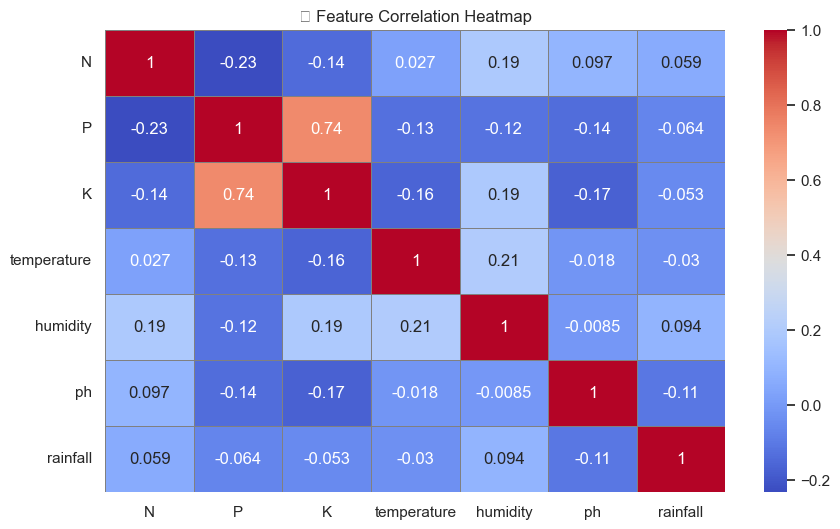

In [7]:
# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(10, 6))

# Draw the heatmap with annotations
sns.heatmap(
    correlation_matrix,
    annot=True,               # Display correlation coefficients
    cmap='coolwarm',          # Color map from blue (low) to red (high)
    linewidths=0.5,           # Line width between cells
    linecolor='gray'          # Line color between cells
)

plt.title('🔗 Feature Correlation Heatmap')
plt.show()


### 📊 5. Outlier Detection

**Outliers** are data points that significantly differ from the rest of the data — either much higher or lower than typical values.

- They can **distort statistical metrics** like the mean and standard deviation.
- Outliers may **negatively impact machine learning models**, especially linear and distance-based models.
- Identifying outliers helps in **understanding data variability** and supports better preprocessing decisions.

Common Methods to detect outliers are:
- **Boxplots**: Show the spread of data and highlight values beyond the whiskers (potential outliers).
- **Z-score / IQR methods**: Statistical techniques to systematically flag extreme values.

We’ll use **boxplots** to visually inspect outliers in each numeric column.


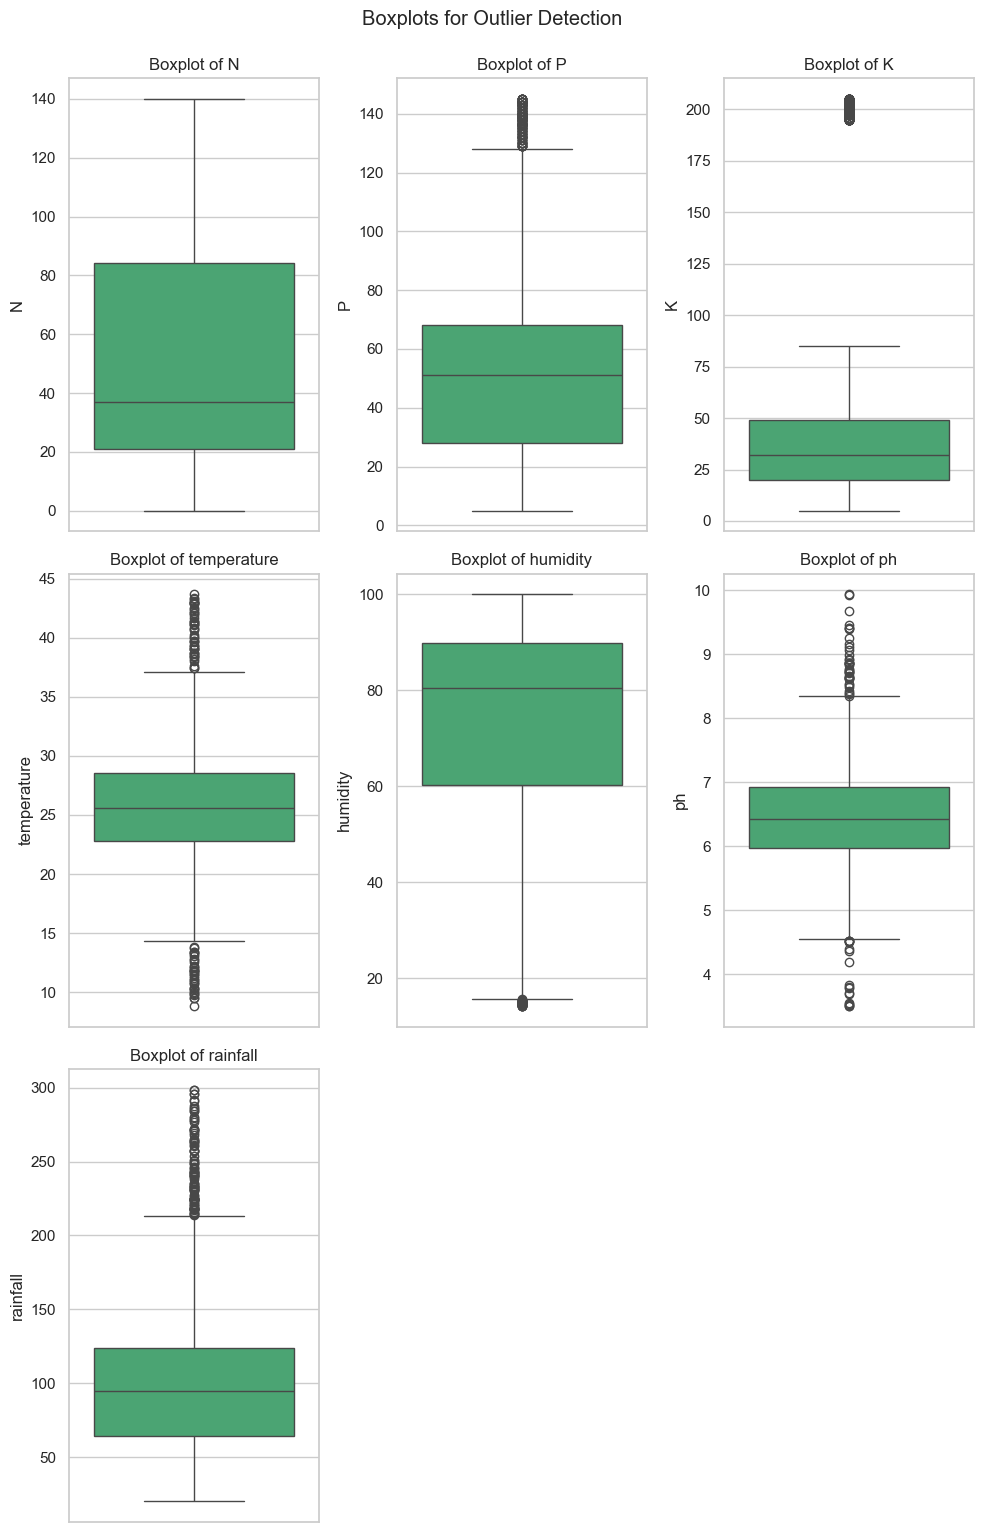

In [8]:
# Plot boxplots for numeric features (excluding target)
numeric_features = df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 15))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='#3CB371')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle("Boxplots for Outlier Detection", y=1.02)  # Removed emoji to avoid font warning
plt.show()


### 📊 Boxplot Insights

- **P**, **K**, and **Rainfall** show many upper-end outliers and right-skewed distributions.
- **N** has moderate spread but no major outliers.
- **Temperature** and **Humidity** are fairly symmetric with few mild outliers.
- **pH** is well-behaved and nearly symmetric.
- Consider outlier handling (e.g., clipping) and robust scaling before modeling.


### 📊 6. Feature Distribution Analysis

Feature distribution analysis helps us understand how the values of each numeric feature are spread out — whether they are normally distributed, skewed, or contain multiple peaks (modes).

#### 📌 Why This Matters:
- Helps decide whether scaling or transformation is needed.
- Provides insight into the nature of the data (e.g., symmetric, right-skewed).
- Aids in selecting appropriate machine learning models.

In this step, we’ll use **histograms** and **kernel density plots (KDE)** to visualize the distribution of each numeric feature.


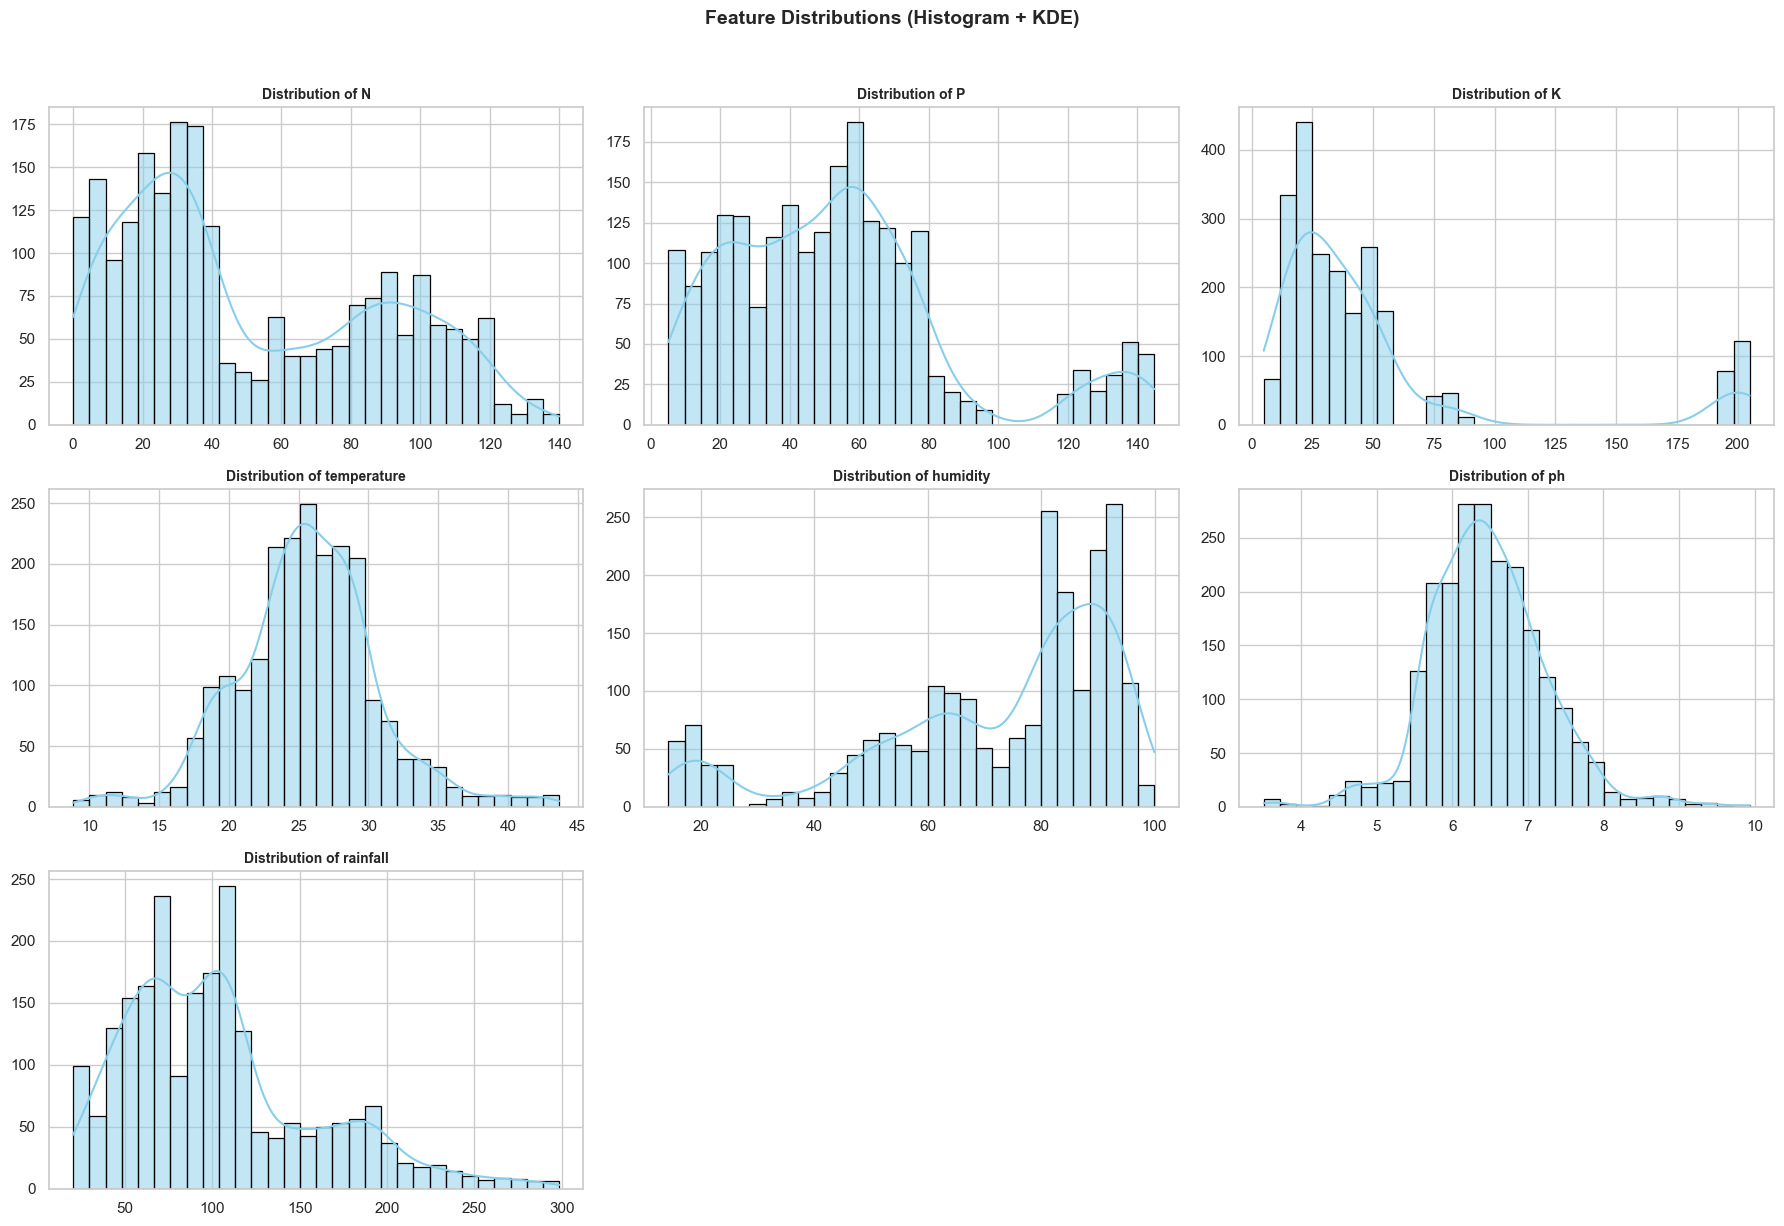

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Optional: Suppress FutureWarnings (from seaborn/pandas)
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black', bins=30)
    plt.title(f'Distribution of {column}', fontsize=10, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True)

# Replace 📈 emoji with plain text to avoid font warning
plt.suptitle('Feature Distributions (Histogram + KDE)', fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()


### 📌 Interpreting Histograms with KDE Plots

Histograms and KDE (Kernel Density Estimation) plots are used to understand the **distribution shape** of numeric features.

#### Histogram:
- Divides data into **bins** and shows **frequency** of values in each bin.
- Helps identify patterns such as **skewness**, **spread**, or **clustering**.

#### KDE Plot:
- A smooth curve that estimates the **probability density** of a variable.
- Highlights **peaks**, **symmetry**, and **multimodal behavior** (multiple peaks).

This:
- Detect whether the feature is **normally distributed** or **skewed**.
- Supports decisions about applying **normalization**, **standardization**, or **log transformation**.
- Helps in selecting **ML models** that assume certain data distributions.

These plots give insight into how features like N, P, K, pH, temperature, etc., behave and guide preprocessing strategies.


### 📊 8. Grouped Aggregation Analysis

Grouped aggregation calculates **summary statistics** (like mean) of numeric features grouped by a **categorical variable** — in this case, crop type (`label`).

#### 📌 Why It Matters:
- Reveals **feature-to-category relationships** (e.g., which crops require more nitrogen or rainfall).
- Highlights how **temperature, humidity, pH, etc. vary across crops**.
- Useful for **feature selection**, **domain understanding**, and **model interpretation**.

#### 📈 How to Read the Table:
- Each **row** is a crop.
- Each **column** shows the **average** value of a feature (e.g., N, P, K, temperature).
- Helps spot patterns (e.g., crops preferring acidic vs. alkaline soil).

#### 🔍 Benefits:
- Informs **feature engineering** and creation of **conditional rules**.
- Identifies **similar crop profiles** that may be challenging to separate during classification.
- Provides **real-world insights** not evident from raw data alone.


In [10]:
# 📊 Mean values of numeric features grouped by crop label
numeric_features = df.select_dtypes(include=np.number).columns  # Optional if not already defined
grouped_means = df.groupby('label')[numeric_features].mean().sort_index()

# Display the top rows
grouped_means.head()


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646


### 🔗 9. Pairwise Feature Relationships

We already analyzed the **linear correlations** between features earlier using a heatmap in the **Correlation Analysis** section. Now, we use a **pairplot** to visualize the **relationships and separation** between key numerical features across different crops.

#### 📌 What is a Pairplot?
A **pairplot** creates scatter plots for every pair of selected features, giving us a visual sense of how:
- Features relate to one another
- Crops cluster or separate based on numeric values
- Relationships may be linear or nonlinear

#### ✨ What We’re Plotting:
We focus on four important features:
- `temperature`
- `humidity`
- `ph`
- `rainfall`

Each point in the plot represents a data record, and its color indicates the corresponding **crop type**.

#### ✅ Why This is Useful:
- Highlights **visual separability** between crop types
- Reveals **feature combinations** that may help in classification
- Assists in understanding **interactions** between numeric variables

This visualization complements earlier statistical analysis and helps in selecting features for modeling.


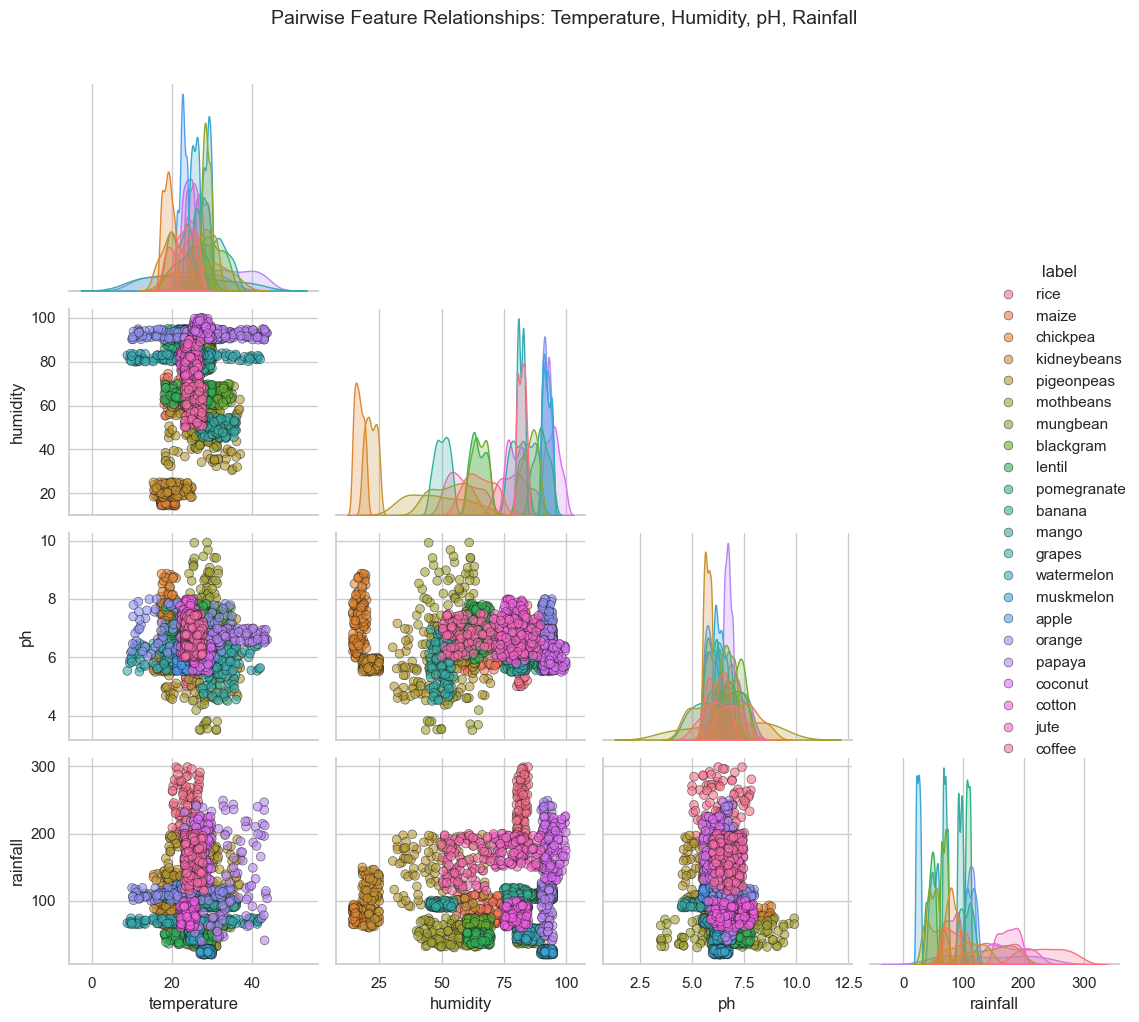

In [11]:
# Select important features for pairwise comparison
selected_features = ['temperature', 'humidity', 'ph', 'rainfall', 'label']
pairplot_df = df[selected_features]

# Set seaborn theme for consistency
sns.set(style="whitegrid")

# Create a color palette for different crop types
custom_palette = sns.color_palette("husl", len(pairplot_df['label'].unique()))

# Create the pairplot
pairplot = sns.pairplot(
    data=pairplot_df,
    hue='label',
    palette=custom_palette,
    corner=True,  # Only show lower triangle to reduce redundancy
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
    diag_kws={'fill': True}  # Updated to avoid seaborn FutureWarning
)

# Add a clean title without emojis to avoid font warnings
pairplot.fig.suptitle("Pairwise Feature Relationships: Temperature, Humidity, pH, Rainfall", 
                      fontsize=14, y=1.02)

plt.tight_layout()
plt.show()


# `🛠️ Data Preprocessing`

Before we can train a machine learning model, we need to **prepare and clean the data**. Raw data is rarely suitable for direct modeling — we must convert it into a structured and scaled format that algorithms can understand and learn from.

### 🧾 Preprocessing Steps:

We’ll go through the following key steps:

1. **Encode the Target Variable**  
   Convert crop names (`label` column) into numerical labels using `LabelEncoder`.

2. **Features Selection and Scaling**  
   Extract input features (X) such as N, P, K, temperature, humidity, ph, and rainfall.

   Apply StandardScaler to normalize the features (mean = 0, std = 1). This helps models like KNN or SVM perform better and prevents any one feature from dominating.

4. **Train-Test Split**  
   Divide the dataset into **training (80%)** and **testing (20%)** sets to evaluate model generalization.

---

✅ These steps ensure that our model receives **clean, scaled, and numerically encoded input**, which leads to **better performance and reliable predictions**.


## 🔹 Step 1: Encoding the Target Variable

The `label` column contains the names of crops as **categorical strings**, which machine learning models cannot interpret directly.  
To address this, we apply **Label Encoding**, which:

- Assigns a **unique numeric ID** to each crop type  
- Transforms the `label` column into an **integer-encoded format**

This allows classification algorithms to process the target variable effectively while maintaining the categorical distinction between crops.

 Note: Label encoding is appropriate here because crop names have no ordinal relationship — we only need to differentiate between categories.


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Optional: Check encoded classes
print("Encoded Crop Labels:\n", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded Crop Labels:
 {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


## 🔹 Step 2: Feature Selection and Scaling

Now that our target variable is encoded, we prepare the input features for modeling.

#### We will:
- **Separate features (X)**: All input columns — N, P, K, temperature, humidity, ph, rainfall
- **Separate target (y)**: The encoded crop label (label_encoded)
- **Apply Standard Scaling** to the features:
  - Transforms data to have **mean = 0** and **standard deviation = 1**
  - Essential for models like **KNN**, **SVM**, and **Gradient Descent-based** methods

#### Scaling:
- Prevents features with large ranges from **dominating** the model
- Ensures **faster convergence** during training
- Improves **model accuracy and performance consistency**

Note: We only scale the features, not the target.


In [13]:
from sklearn.preprocessing import StandardScaler

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔹 Step 3: Splitting the Dataset into Training and Testing Sets

To evaluate how well our model generalizes to new, unseen data, we split the dataset into:

- **Training set (80%)** — used to fit the model  
- **Testing set (20%)** — used to evaluate the model's performance

We use **train_test_split** from **sklearn.model_selection** for this purpose.

✅ To maintain class balance (i.e., equal representation of each crop), we apply **stratified sampling** using the **stratify=y** argument.  
This ensures that the **distribution of crop classes** remains consistent in both subsets.


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1760, 7)
Testing set shape: (440, 7)


# `Model Training and Evaluation`

In this step, we will:

1. Train a `Random Forest Classifier` on the training data.
2. Evaluate its performance on the testing set using metrics such as:
   - Accuracy Score
   - Confusion Matrix
   - Classification Report (Precision, Recall, F1-score)

The goal is to assess how well the model can predict the correct crop based on soil and climate features.


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


## Evaluating the Random Forest Classifier

Now we evaluate how well our trained model performs on the testing set. We will examine:

- **Accuracy Score**: Overall percentage of correct predictions
- **Confusion Matrix**: Breakdown of predicted vs actual classes
- **Classification Report**: Detailed precision, recall, and F1-score for each crop class


In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9955

Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0

## Evaluation Summary

The **Random Forest Classifier** achieved an accuracy of `99.55%` on the test set.  
This implies the model was able to perfectly learn patterns from the training data and generalize well on the testing data.

However, such high performance could indicate:

- The dataset is **synthetic** or **cleaned/simplified**, possibly designed for teaching/demo purposes.
- The features (N, P, K, temperature, humidity, pH, rainfall) provide **strong signals** for classifying the target crop.

Despite this, the model's performance is excellent and suitable for building a **Streamlit web app** that demonstrates EDA and ML prediction in a user-friendly way.


# `Saving the Trained Model`

After successfully training and evaluating the model, we will **save it for future use** — especially when deploying it in real-world applications like a **Streamlit web app**.

### Why Save the Model?
- Avoid retraining every time you want to make predictions.
- Easily deploy your model in other environments (e.g., web apps, APIs).
- Ensure reproducibility and portability of your machine learning pipeline.

To save the trained model, we’ll use the **`joblib`** library — a fast and efficient tool for serializing Python objects, especially suitable for large NumPy arrays or machine learning models.

By saving the model as a `.pkl` file, we can:
- Load it anytime using `joblib.load()`
- Integrate it into production or interactive apps without repeating the training process

---

✅ This step makes your model **reusable, shareable, and ready for deployment**!


In [17]:
import joblib

# After training
joblib.dump(rf_model, 'crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')



['label_encoder.pkl']